# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("C:\\Users\\pc\\Desktop\\jupyter_notebook\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx")

In [3]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
df1 = pd.read_excel("C:\\Users\\pc\\Desktop\\jupyter_notebook\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")

In [5]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df2 = pd.read_excel("C:\\Users\\pc\\Desktop\\jupyter_notebook\\Flight_Ticket_Participant_Datasets\\Sample_submission.xlsx")

In [7]:
df2.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
df.shape

(10683, 11)

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


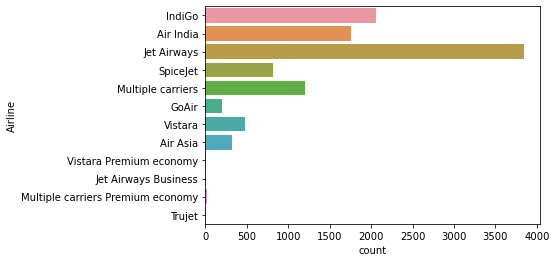

In [14]:
sns.countplot(y='Airline',data=df)
print(df['Airline'].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


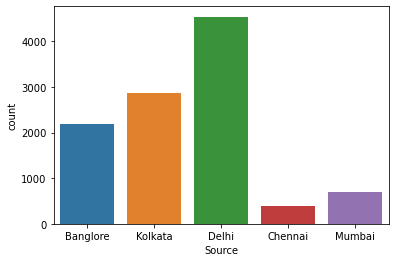

In [15]:
sns.countplot(x='Source',data=df)
print(df['Source'].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


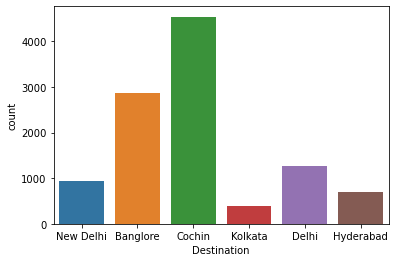

In [16]:
sns.countplot(x='Destination',data=df)
print(df['Destination'].value_counts())

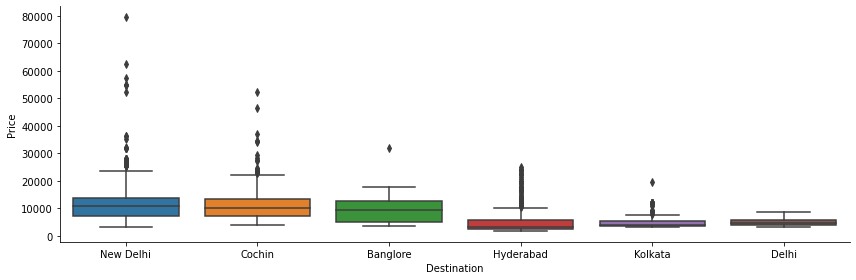

In [17]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


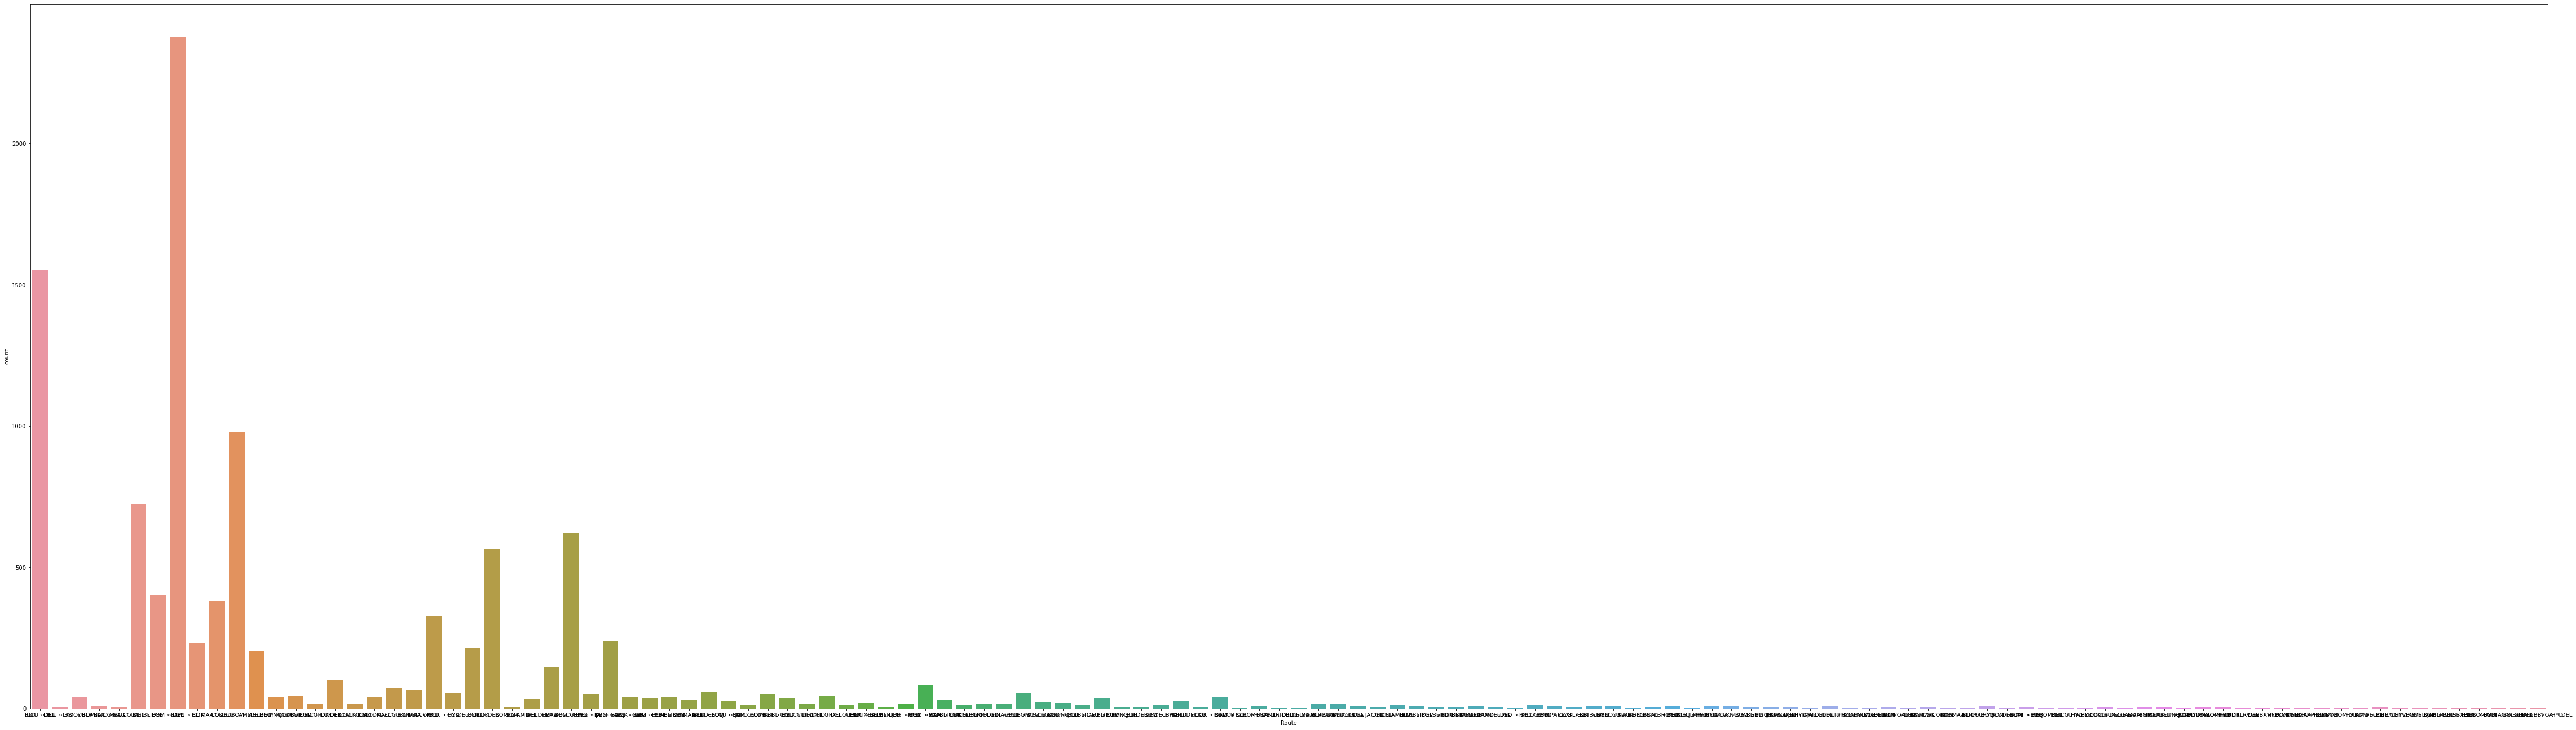

In [18]:
plt.figure(figsize=(80,23))
sns.countplot(x='Route',data=df)
print(df['Route'].value_counts())
plt.savefig('pd.png')

<AxesSubplot:ylabel='Price'>

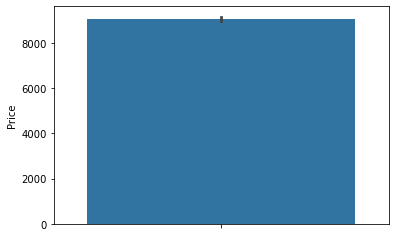

In [19]:
sns.barplot(y='Price',data=df)


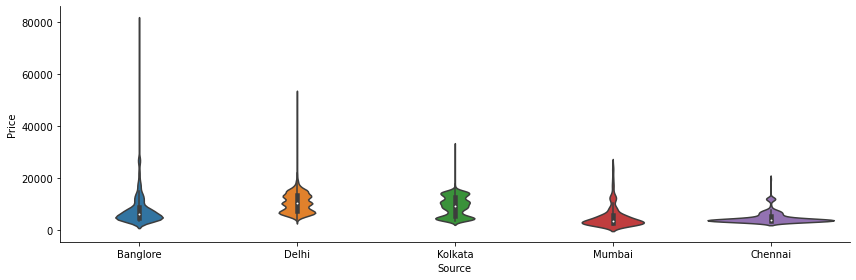

In [20]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

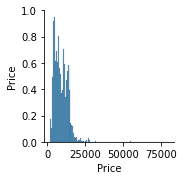

In [21]:
sns.pairplot(data=df , palette ='coolwarm')

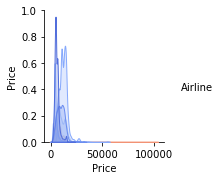

In [22]:
sns.pairplot(df ,hue ="Airline", palette ='coolwarm')

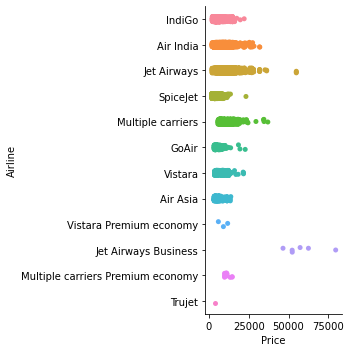

In [23]:
sns.catplot(y='Airline',x='Price',data=df)
#jet airways  business more costly other than

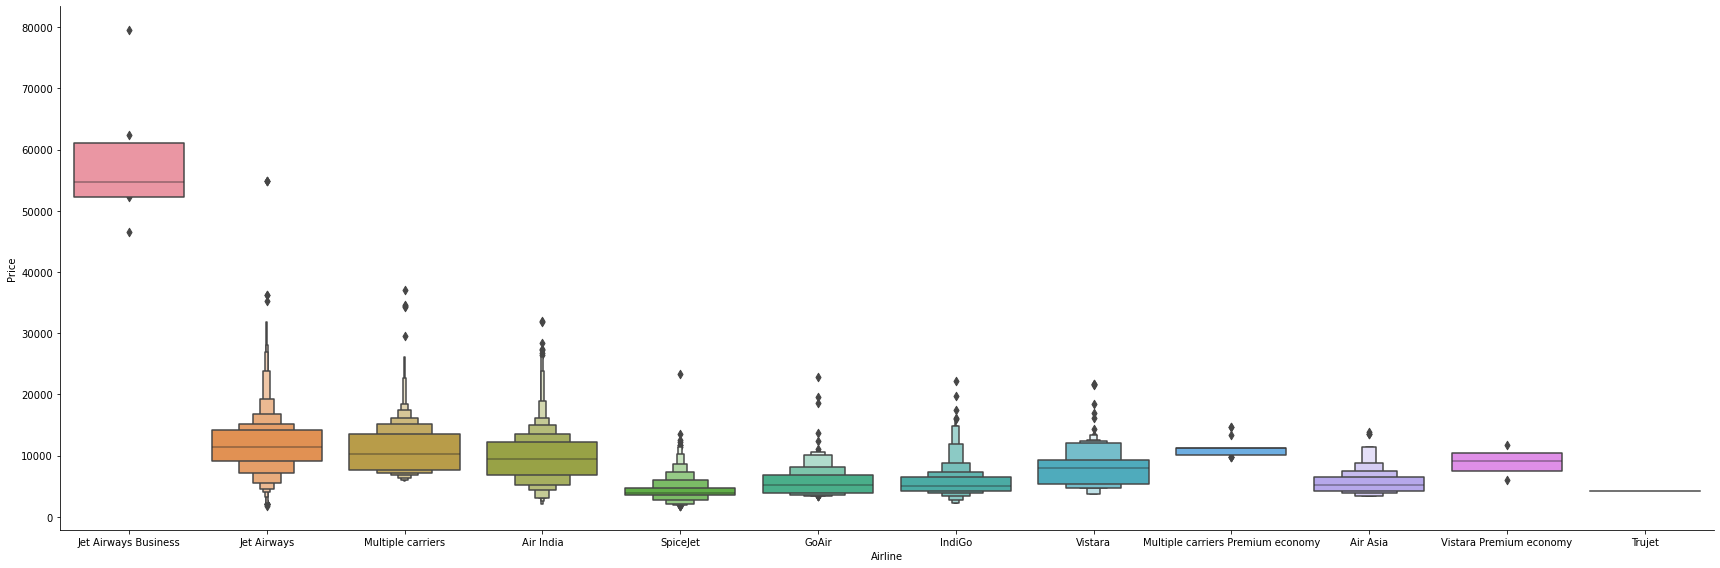

In [24]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

# eda peocess data wrangling

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [27]:
df['day'] = df['Date_of_Journey'].dt.day
df['month'] = df['Date_of_Journey'].dt.month
df['year'] = df['Date_of_Journey'].dt.year

In [28]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [30]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [31]:
df['hour'] = df['Arrival_Time'].dt.hour
df['minute'] = df['Arrival_Time'].dt.minute

In [32]:
df.drop(['Arrival_Time','Additional_Info','Route'],axis=1,inplace=True)

In [33]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,day,month,year,hour,minute
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,5,1,2019,13,15
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,13882,6,9,2019,4,25
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,5,12,2019,23,30
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,3,1,2019,21,35


In [34]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [35]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,day,month,year,hour,minute
0,IndiGo,Banglore,New Delhi,22:20,170,non-stop,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,05:50,445,2 stops,7662,5,1,2019,13,15
2,Jet Airways,Delhi,Cochin,09:25,1140,2 stops,13882,6,9,2019,4,25
3,IndiGo,Kolkata,Banglore,18:05,325,1 stop,6218,5,12,2019,23,30
4,IndiGo,Banglore,New Delhi,16:50,285,1 stop,13302,3,1,2019,21,35


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10683 non-null  object
 1   Source       10683 non-null  object
 2   Destination  10683 non-null  object
 3   Dep_Time     10683 non-null  object
 4   Duration     10683 non-null  int64 
 5   Total_Stops  10682 non-null  object
 6   Price        10683 non-null  int64 
 7   day          10683 non-null  int64 
 8   month        10683 non-null  int64 
 9   year         10683 non-null  int64 
 10  hour         10683 non-null  int64 
 11  minute       10683 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 792.9+ KB


In [37]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [38]:
df['dep_hour'] = df['Dep_Time'].dt.hour
df['dep_minute'] = df['Dep_Time'].dt.minute

In [39]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [40]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,2019,21,35,16,50


In [41]:
df.dropna()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,4107,4,9,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,155,non-stop,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,180,non-stop,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,160,non-stop,12648,3,1,2019,14,10,11,30


In [42]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    1
Price          0
day            0
month          0
year           0
hour           0
minute         0
dep_hour       0
dep_minute     0
dtype: int64

In [43]:
df.dropna()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,4107,4,9,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,155,non-stop,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,180,non-stop,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,160,non-stop,12648,3,1,2019,14,10,11,30


In [44]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,2019,21,35,16,50


In [45]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    1
Price          0
day            0
month          0
year           0
hour           0
minute         0
dep_hour       0
dep_minute     0
dtype: int64

In [46]:
df.fillna(df['Total_Stops'].mode()[0],inplace =True)

In [47]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Price          0
day            0
month          0
year           0
hour           0
minute         0
dep_hour       0
dep_minute     0
dtype: int64

In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [50]:
for i in df.columns:
    if df[i].dtypes=='object':
     df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [51]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
0,3.0,0.0,5.0,170,4.0,3897,24,3,2019,1,10,22,20
1,1.0,3.0,0.0,445,1.0,7662,5,1,2019,13,15,5,50
2,4.0,2.0,1.0,1140,1.0,13882,6,9,2019,4,25,9,25
3,3.0,3.0,0.0,325,0.0,6218,5,12,2019,23,30,18,5
4,3.0,0.0,5.0,285,0.0,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,150,4.0,4107,4,9,2019,22,25,19,55
10679,1.0,3.0,0.0,155,4.0,4145,27,4,2019,23,20,20,45
10680,4.0,0.0,2.0,180,4.0,7229,27,4,2019,11,20,8,20
10681,10.0,0.0,5.0,160,4.0,12648,3,1,2019,14,10,11,30


# check the outliers

In [52]:
df.shape

(10683, 13)

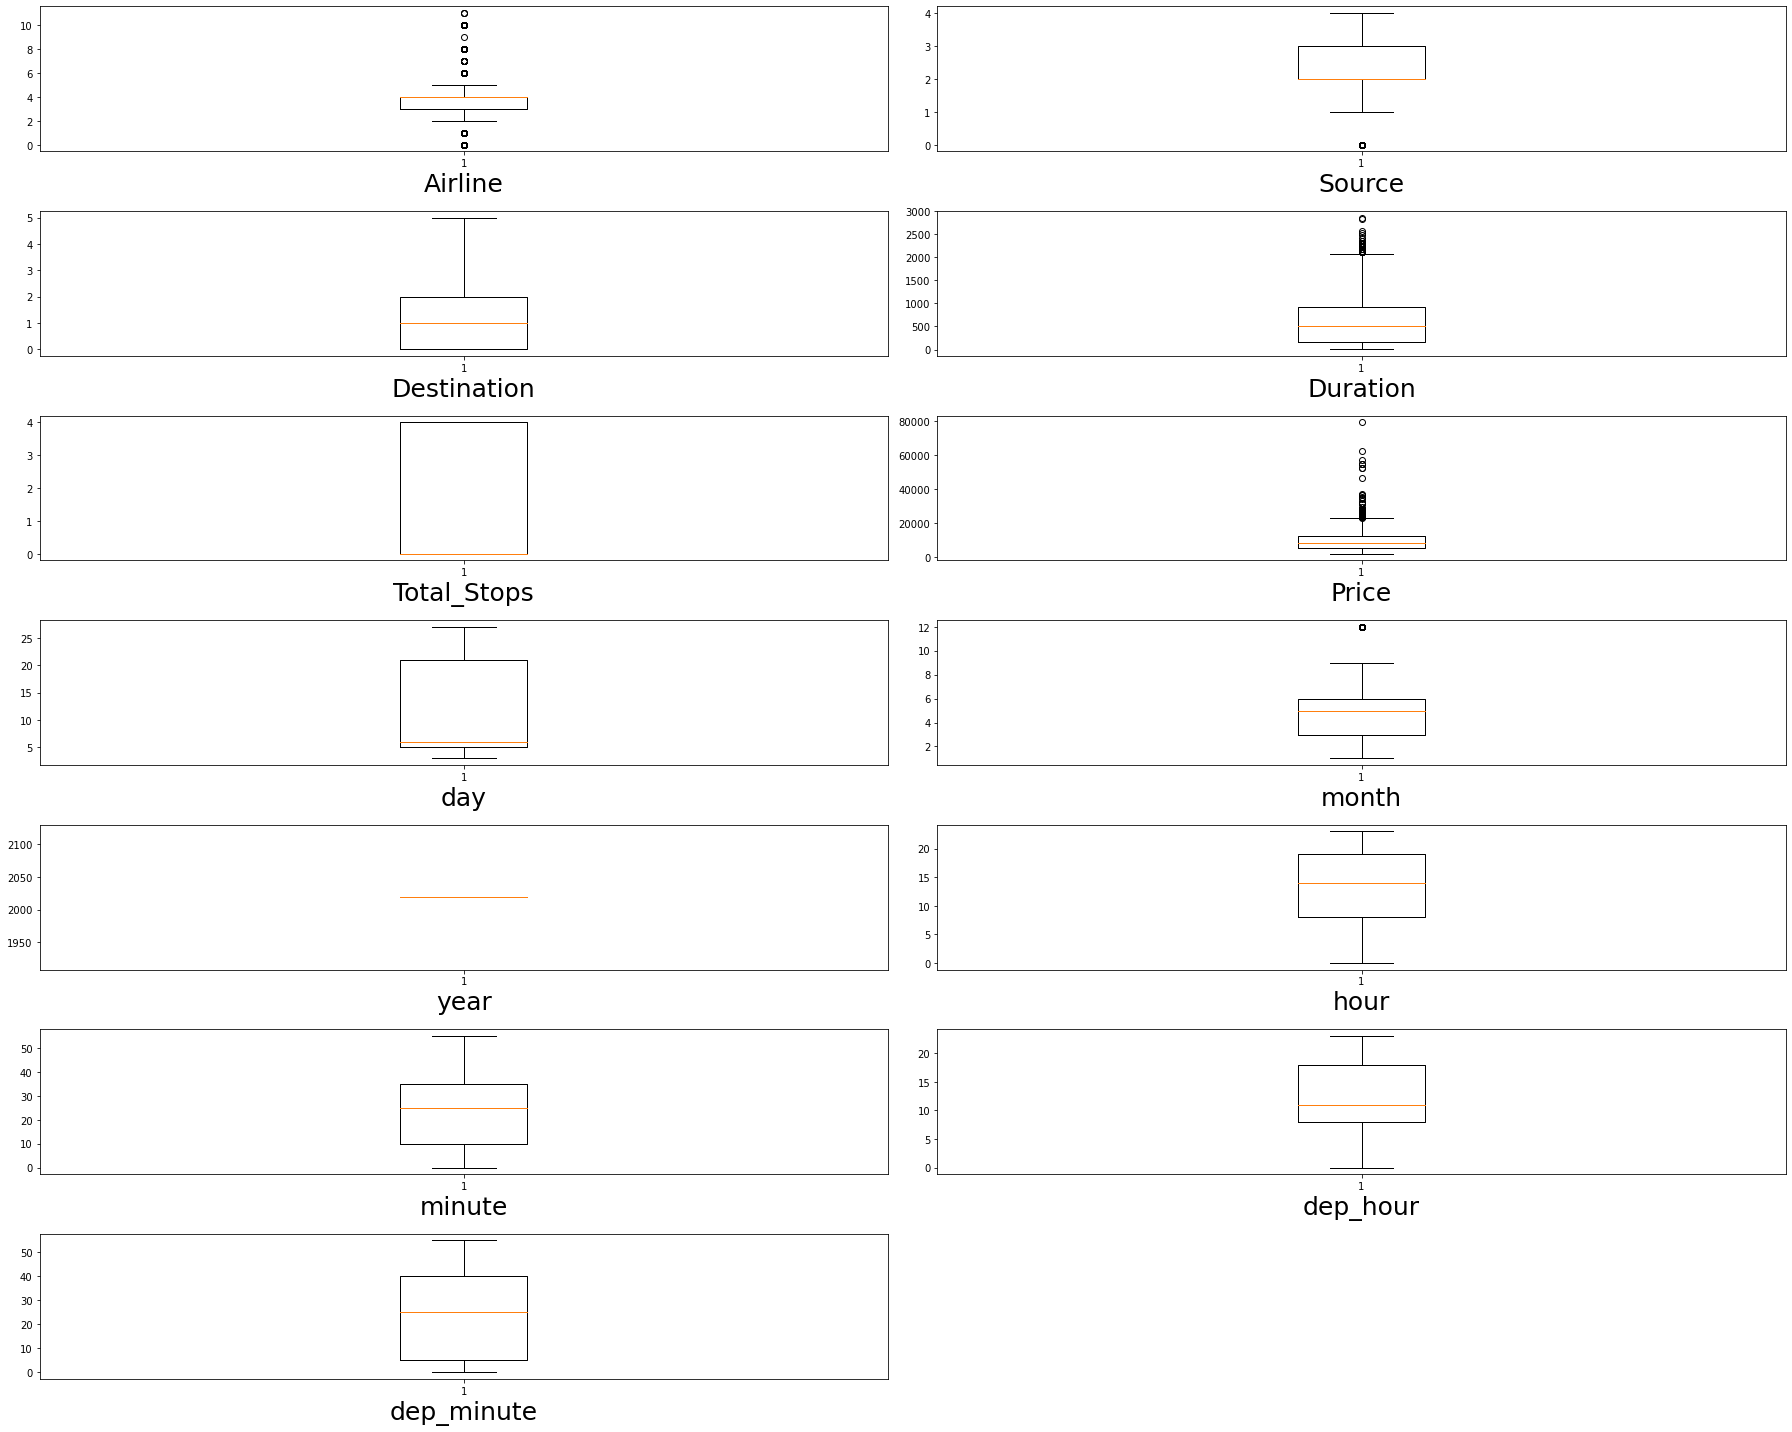

In [61]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()        

In [54]:
df['Airline'].describe()

count    10683.000000
mean         3.965927
std          2.352155
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max         11.000000
Name: Airline, dtype: float64

In [55]:
df['Source'].describe()

count    10683.000000
mean         1.952261
std          1.177221
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Source, dtype: float64

In [56]:
df['Duration'].describe()

count    10683.000000
mean       643.093232
std        507.862001
min          5.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: Duration, dtype: float64

In [57]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [ ]:
print("highet allowence"df['Price'])

In [58]:
#ist quantile
q1 = df.quantile(0.25)
#2nd quantile
q3 = df.quantile(0.75)
#iqr
iqr = q3-q1

In [59]:
iqr

Airline           1.0
Source            1.0
Destination       2.0
Duration        760.0
Total_Stops       4.0
Price          7096.0
day              16.0
month             3.0
year              0.0
hour             11.0
minute           25.0
dep_hour         10.0
dep_minute       35.0
dtype: float64

In [62]:
print('Highest allowed',df['Price'].mean()+3*df['Price'].std())
print('Lowest allowed',df['Price'].mean()-3*df['Price'].std())

Highest allowed 22921.141621016657
Lowest allowed -4747.013379885886


In [64]:
df = df[(df['Price']<22921.14162)&(df['Price']>-4747.013379 )] 

In [65]:
df['Price'].describe()

count    10587.000000
mean      8895.002267
std       4064.900744
min       1759.000000
25%       5228.000000
50%       8355.000000
75%      12310.000000
max      22798.000000
Name: Price, dtype: float64

In [66]:
print('Highest allowed',df['Duration'].mean()+3*df['Duration'].std())
print('Lowest allowed',df['Duration'].mean()-3*df['Duration'].std())

Highest allowed 2166.889512624568
Lowest allowed -883.1415198031832


In [67]:
df = df[(df['Duration']<2166.8895)&(df['Duration']>-883.141519 )]

In [68]:
df['Duration'].describe()

count    10522.000000
mean       631.649876
std        492.836876
min          5.000000
25%        170.000000
50%        510.000000
75%        925.000000
max       2135.000000
Name: Duration, dtype: float64

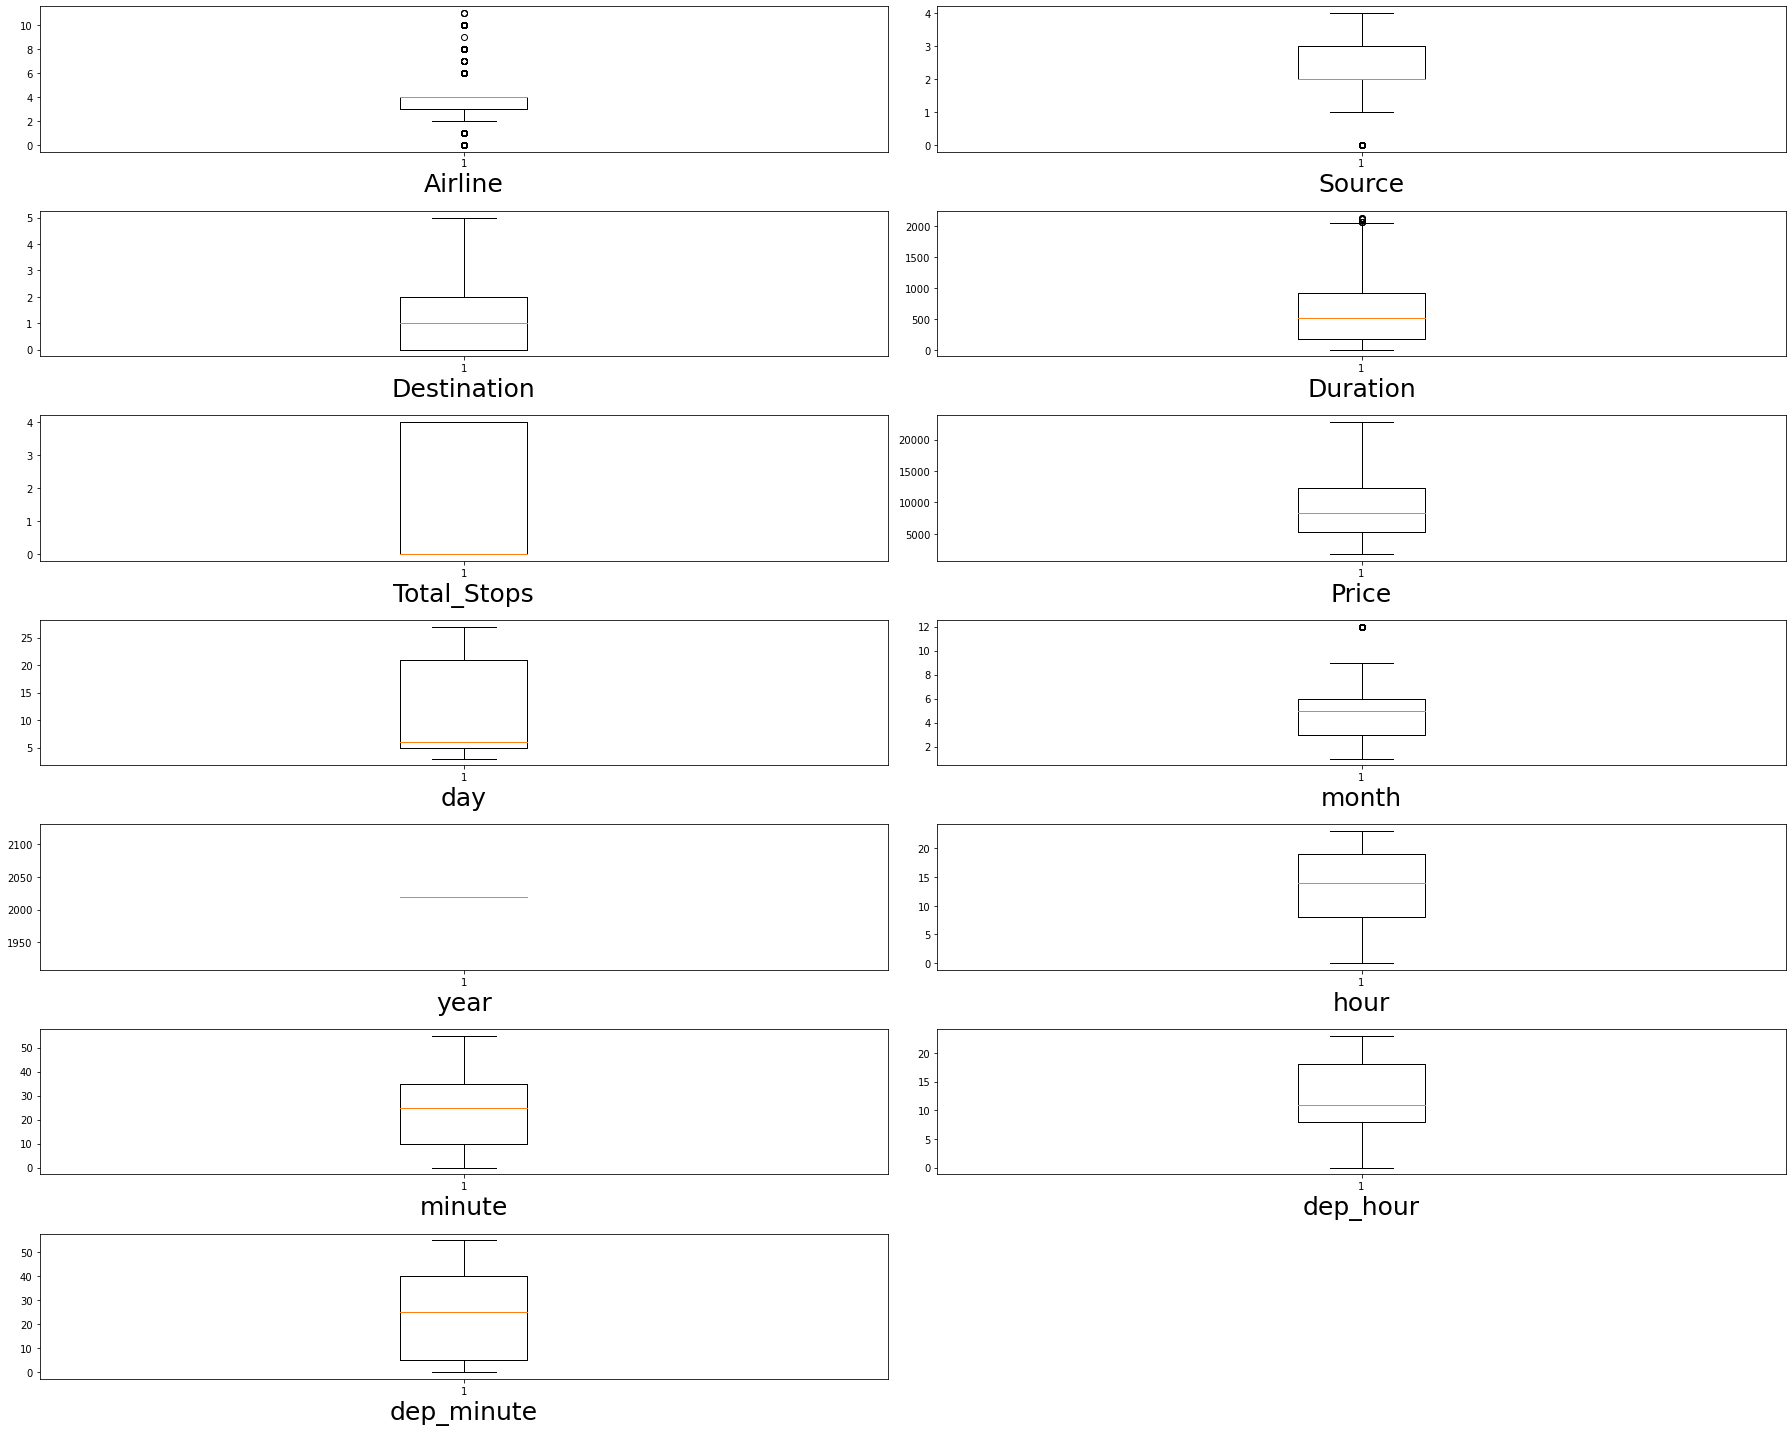

In [69]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()        

removed the outliers

# check the correlation

In [70]:
df.corr()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
Airline,1.000000,-0.014490,0.020729,-0.147129,0.036392,-0.042538,0.030245,-0.009375,NaN,-0.000930,-0.074155,-0.042442,-0.061241
Source,-0.014490,1.000000,-0.584029,0.171680,-0.236792,0.075936,-0.003350,0.045964,NaN,0.025344,0.020242,0.060036,-0.049811
Destination,0.020729,-0.584029,1.000000,-0.276149,0.358604,-0.173566,-0.034949,-0.084179,NaN,-0.040652,0.017689,-0.075562,0.119637
Duration,-0.147129,0.171680,-0.276149,1.000000,-0.622202,0.577541,-0.035374,0.065267,NaN,0.038370,-0.074133,0.026538,-0.019224
Total_Stops,0.036392,-0.236792,0.358604,-0.622202,1.000000,-0.623364,0.037846,-0.065241,NaN,-0.097431,0.176983,0.038086,0.052990
Price,-0.042538,0.075936,-0.173566,0.577541,-0.623364,1.000000,-0.141429,0.070719,NaN,0.034305,-0.101690,0.012339,-0.054342
day,0.030245,-0.003350,-0.034949,-0.035374,0.037846,-0.141429,1.000000,-0.279326,NaN,-0.002527,-0.021504,-0.003732,-0.013577
month,-0.009375,0.045964,-0.084179,0.065267,-0.065241,0.070719,-0.279326,1.000000,NaN,-0.003853,-0.025934,0.027110,0.009714
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,-0.000930,0.025344,-0.040652,0.038370,-0.097431,0.034305,-0.002527,-0.003853,NaN,1.000000,-0.154377,0.013569,0.045268


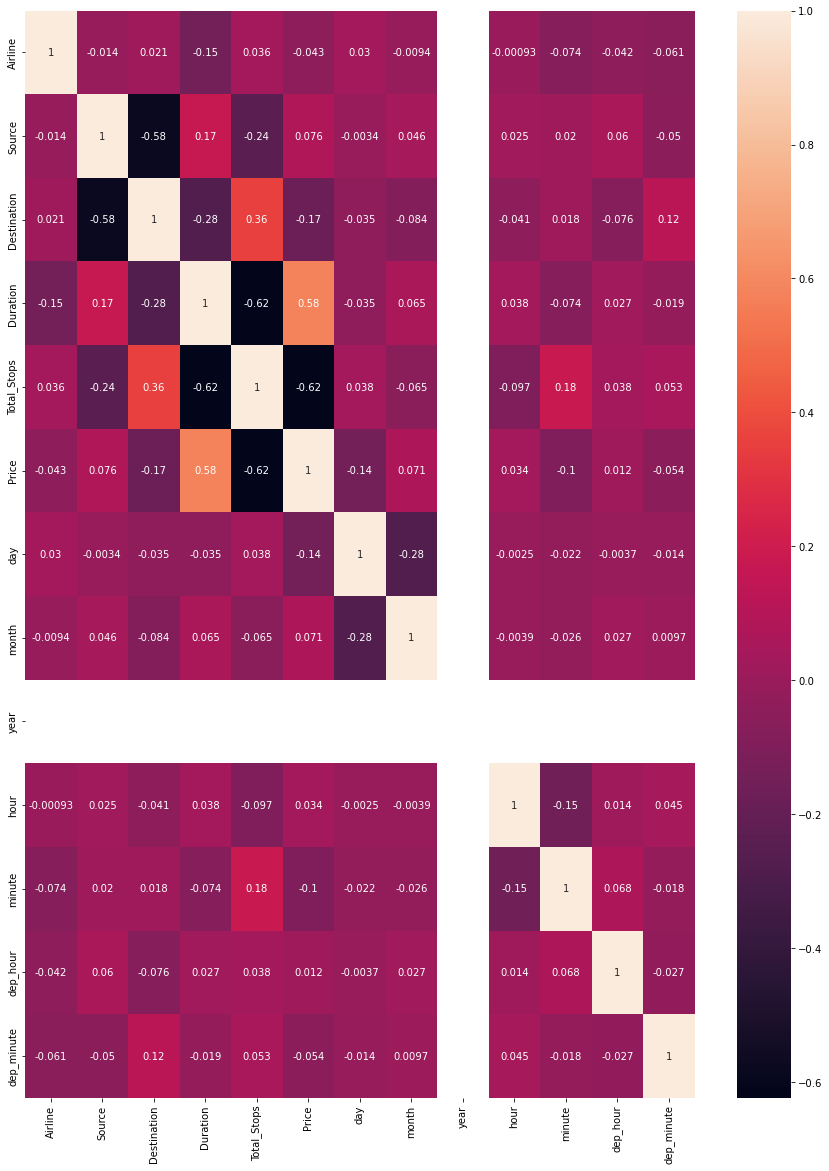

In [74]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True)
plt.savefig('corr.png')

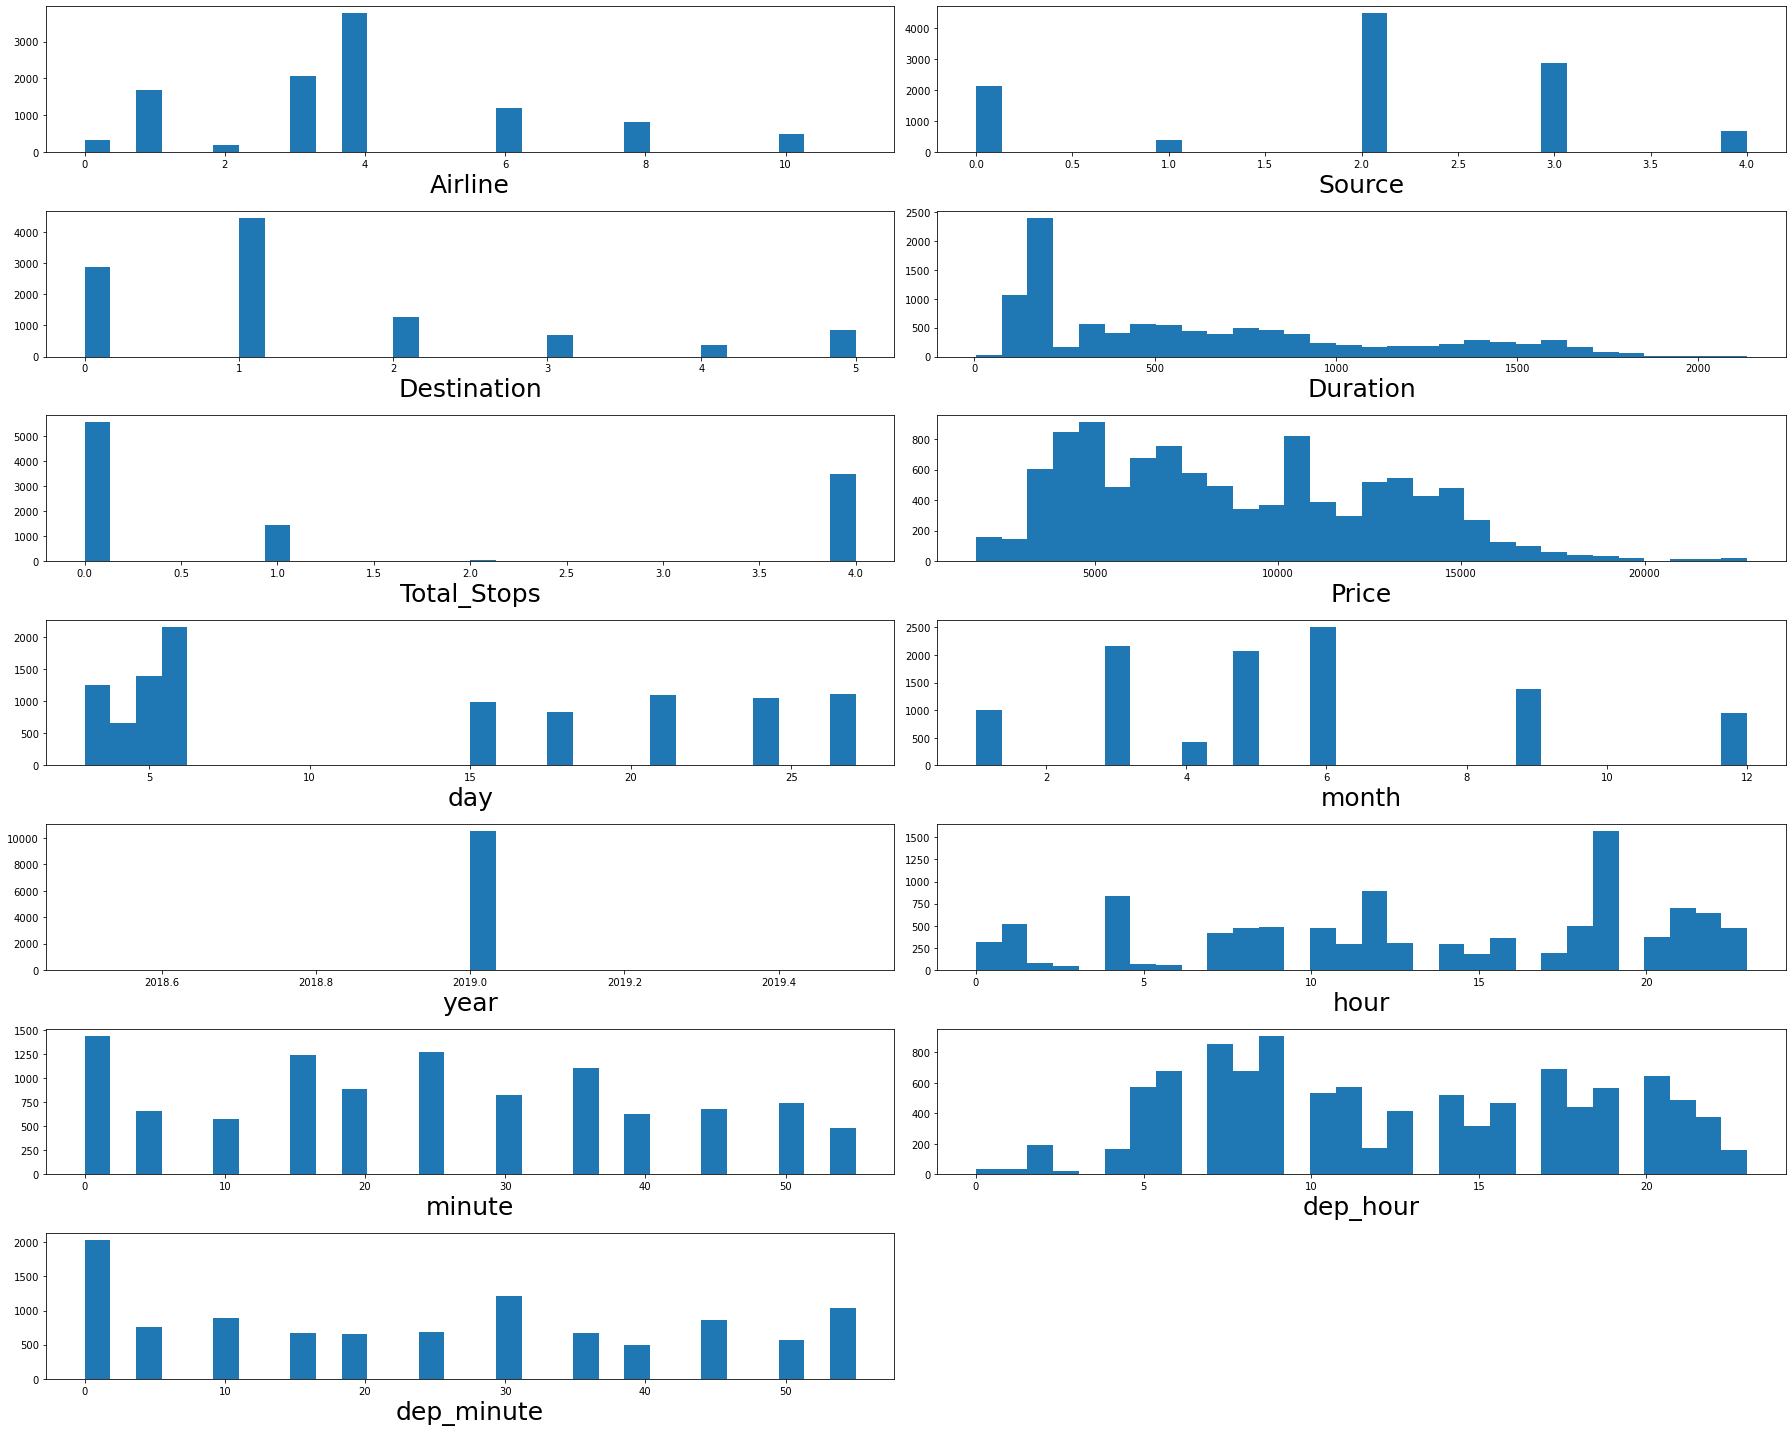

In [75]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()

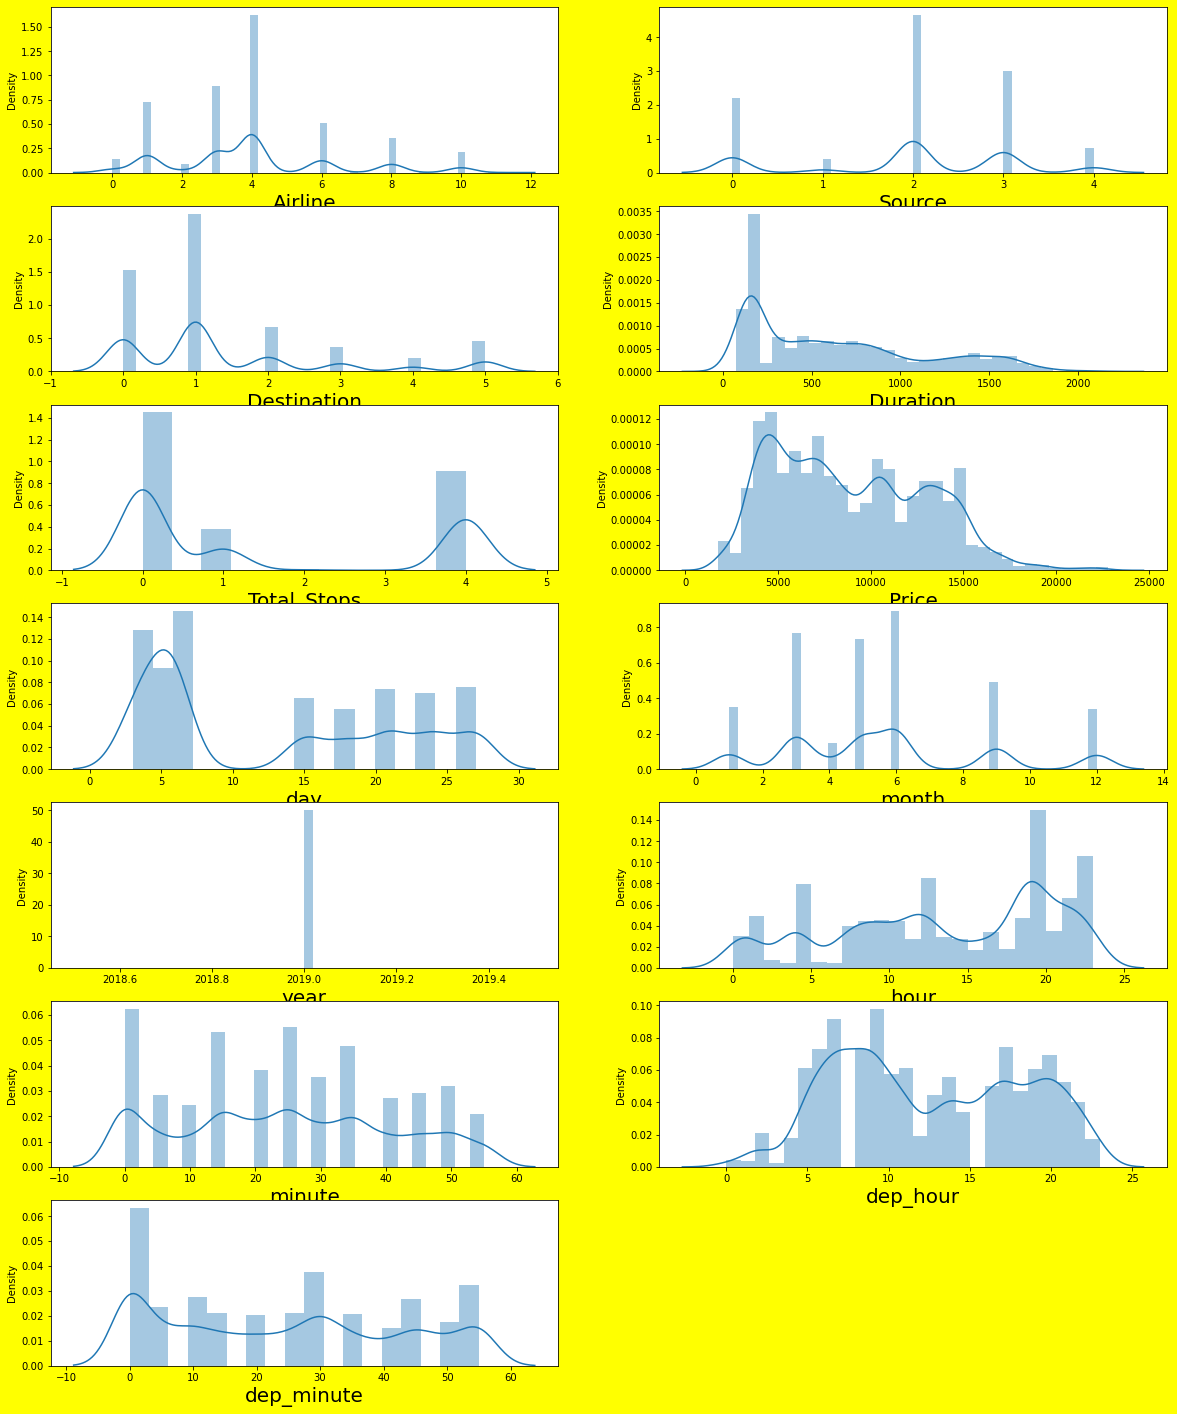

In [78]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

In [79]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [80]:
x.skew()

Airline        0.729381
Source        -0.436860
Destination    1.261808
Duration       0.777083
Total_Stops    0.615379
day            0.355030
month          0.634031
year           0.000000
hour          -0.362123
minute         0.107285
dep_hour       0.103214
dep_minute     0.171124
dtype: float64

In [81]:
sk = x.skew()

In [82]:
sk[np.abs(sk)<0.5].all()

False

In [83]:
from sklearn.preprocessing import PowerTransformer

In [84]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)

In [85]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'day',
       'month', 'year', 'hour', 'minute', 'dep_hour', 'dep_minute'],
      dtype='object')

In [86]:
x = pd.DataFrame(data_trans,columns=['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'day',
       'month', 'year', 'hour', 'minute', 'dep_hour', 'dep_minute'])

In [87]:
x

,Airline,Source,Destination,Duration,Total_Stops,day,month,year,hour,minute,dep_hour,dep_minute
0,-0.301163,-1.610864,1.773242,-1.053425,1.287023,1.174903,-0.840864,0.0,-1.790456,-0.772444,1.546401,0.026074
1,-1.423797,0.895421,-1.363604,-0.044865,0.348563,-0.843176,-1.916428,0.0,-0.050893,-0.429747,-1.365401,1.183298
2,0.141562,-0.025779,0.019658,1.067572,0.348563,-0.621090,1.133903,0.0,-1.359302,0.158272,-0.559348,0.259071
3,-0.301163,0.895421,-1.363604,-0.387963,-0.904800,-0.843176,1.848078,0.0,1.415105,0.421356,0.951619,-0.932071
4,-0.301163,-1.610864,1.773242,-0.527339,-0.904800,-1.432162,-1.916428,0.0,1.121216,0.669889,0.639747,1.183298
...,...,...,...,...,...,...,...,...,...,...,...,...
10517,-2.245089,0.895421,-1.363604,-1.175663,1.287023,-1.107151,1.133903,0.0,1.268124,0.158272,1.103695,1.338377
10518,-1.423797,0.895421,-1.363604,-1.143832,1.287023,1.331561,-0.425206,0.0,1.415105,-0.123321,1.253423,1.020515
10519,0.141562,-1.610864,0.723846,-0.996938,1.287023,1.331561,-0.425206,0.0,-0.342841,-0.123321,-0.749579,0.026074
10520,2.116174,-1.610864,1.773242,-1.112882,1.287023,-1.432162,-1.916428,0.0,0.095267,-0.772444,-0.195712,0.470817


In [92]:
x.skew()

Airline       -0.014704
Source        -0.236881
Destination    0.041459
Duration      -0.047836
Total_Stops    0.323740
day            0.011370
month         -0.023814
year           0.000000
hour          -0.353166
minute        -0.350979
dep_hour      -0.106178
dep_minute    -0.358645
dtype: float64

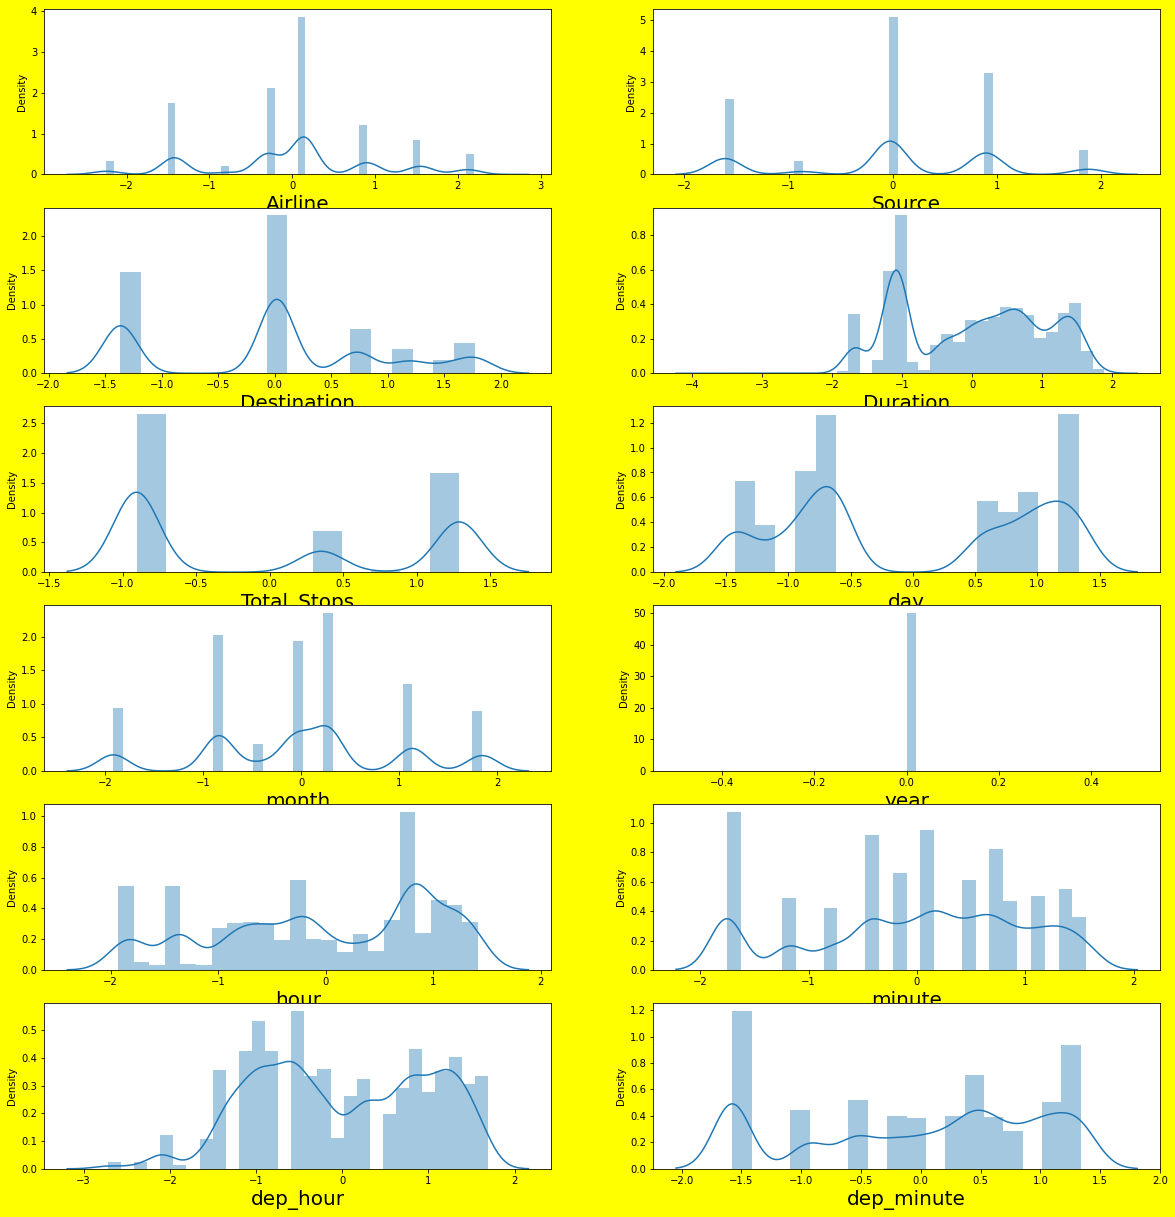

In [93]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in x:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

removed the skew

# scaling data

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
ms = MinMaxScaler()

In [107]:
x_scaled = ms.fit_transform(x)

In [108]:
x_scaled.shape[1]

10

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [110]:
vif = pd.DataFrame()

In [111]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [112]:
vif['features'] = x.columns

In [113]:
vif

,vif,features
0,5.288735,Airline
1,4.565329,Source
2,3.938023,Destination
3,2.176496,Total_Stops
4,2.925232,day
5,4.256507,month
6,4.372080,hour
7,3.941299,minute
8,7.132499,dep_hour
9,3.365284,dep_minute


In [104]:
d = x.drop(['year','Duration'],axis=1,inplace=True)

# model selection

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [116]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("r2_score  is ",maxAccu," on Random_state ",maxRS)

r2_score  is  0.33543731570870283  on Random_state  58


In [117]:
lr.fit(x_train, y_train)

LinearRegression()

In [118]:
lr.score(x_train,y_train)

0.31419597127110777

In [186]:
lr.score(x_test,y_test)

0.29623919092270656

In [187]:
y_pred = lr.predict(x_test)

In [188]:
r2_score(y_test,y_pred)

0.29623919092270656

In [189]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [190]:
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.296239206712536

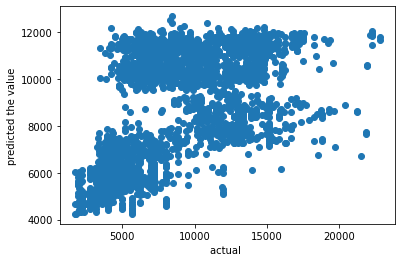

In [191]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

# DecisionTreeRegressor

In [120]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(r2_score(y_test,y_pred)*100)


69.15796305732229


In [121]:
dt.score(x_train,y_train)

0.9655835124618353

In [176]:
dt.score(x_test,y_test)

0.6915796305732229

In [177]:
y_pred = dt.predict(x_test)

In [179]:
r2_score(y_test,y_pred)

0.6915796305732229

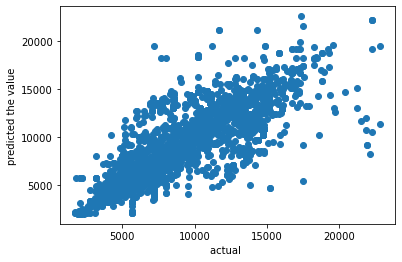

In [185]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

In [181]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas = None,max_iter=43,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)


In [182]:
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.29624108259510074

In [183]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [184]:
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.296239206712536

In [ ]:
 thats aoverfitting 

# RandomForestRegressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print(r2_score(y_test,pred)*100)


80.61955513140843


In [124]:
rr.score(x_train,y_train)

0.9522602614811624

In [171]:
rr.score(x_test,y_test)

0.8061955513140843

In [173]:
y_pred = rr.predict(x_test)

In [174]:
r2_score(y_test,y_pred)

0.8061955513140843

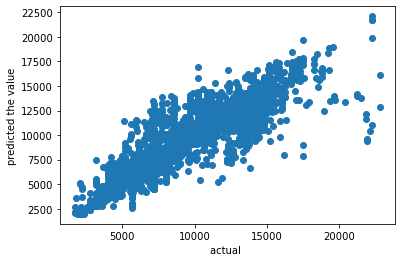

In [175]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

In [ ]:
that s overfiited

# knn regressor

In [126]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(r2_score(y_test,y_pred)*100)


70.14747461886029


In [127]:
knn.score(x_train,y_train)

0.8212238955631969

In [167]:
knn.score(x_test,y_test)

0.7014747461886028

In [168]:
y_pred = knn.predict(x_test)

In [169]:
r2_score(y_test,y_pred)

0.7014747461886028

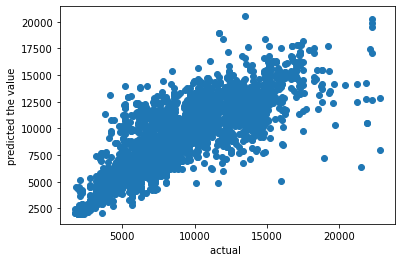

In [170]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

In [ ]:
thats a overfitted

# graient boosting regressor

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [130]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [131]:
gbr.score(x_train,y_train)

0.789034385777168

In [132]:
gbr.score(x_test,y_test)

0.7666700763610532

In [164]:
y_pred = gbr.predict(x_test)

In [165]:
r2_score(y_test,y_pred)

0.7666700763610532

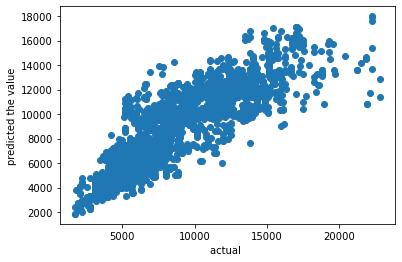

In [166]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

In [ ]:
these are best model becoze train and test must have close

# boosting classifier

# AdaBoostRegressor

In [133]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [134]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [135]:
ada.score(x_train,y_train)

0.6185403775262275

In [136]:
ada.score(x_test,y_test)

0.5979280077429532

In [137]:
y_pred = ada.predict(x_test)

In [161]:
accuracy = r2_score(y_test,y_pred)

In [162]:
accuracy

0.5979280077429532

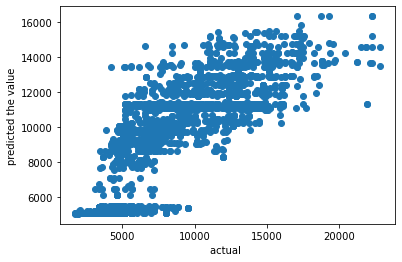

In [163]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

# xgb regressor

In [ ]:
!pip install xgboost in command

In [145]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

# cross validation check overfitting

In [146]:
from sklearn.model_selection import KFold ,cross_val_score

k_f = KFold(n_splits=4,shuffle=True)

k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [147]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
   print("train = ",train,"test = ",test)

train =  [1 2 4 5 7 8 9] test =  [0 3 6]
train =  [0 1 3 4 5 6 8] test =  [2 7 9]
train =  [0 2 3 4 5 6 7 9] test =  [1 8]
train =  [0 1 2 3 6 7 8 9] test =  [4 5]


In [148]:
cross_val_score(gbr,x_scaled,y,cv=8)

array([0.7738832 , 0.7774663 , 0.78091519, 0.77922696, 0.7817782 ,
       0.76877183, 0.77268329, 0.76818612])

In [149]:
cross_val_score(GradientBoostingRegressor(),x_scaled,y,cv=5).mean()

0.7752874497002289

In [151]:
#check random forest
cross_val_score(rr,x_scaled,y,cv=8)

array([0.81479255, 0.8208048 , 0.81658299, 0.81878517, 0.82855123,
       0.80011892, 0.79908116, 0.79243652])

In [152]:
cross_val_score(RandomForestRegressor(),x_scaled,y,cv=5).mean()

0.8135411268450765

In [153]:
#ada boost
cross_val_score(ada,x_scaled,y,cv=8)

array([0.59185729, 0.62330821, 0.64999258, 0.62322082, 0.62065752,
       0.58729346, 0.57168166, 0.58113359])

In [154]:
cross_val_score(AdaBoostRegressor(),x_scaled,y,cv=5).mean()

0.6086734524959337

# model evalution

In [155]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

3381.5907692446194

In [156]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = dt.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

2238.6182332765884

In [157]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = rr.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

1774.558746291043

In [158]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = gbr.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

1947.1245370734694

In [159]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = ada.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

2555.9974789037637

# random forest model less error

# and good accuracy

# hyperparameter tunnig

In [192]:
from sklearn.model_selection import GridSearchCV

In [196]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()


In [197]:

    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]}
            

In [199]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

In [201]:


    grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [202]:
grid.best_score_ , grid.best_params_


(0.8345431121665342,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 8,
  'n_estimators': 30})

In [210]:
estimator = RandomForestRegressor(n_jobs=-1)

In [211]:

    estimator.fit(x_train,y_train)
    y_predict = estimator.predict(x_test)
    print("R2 score:",r2_score(y_test,y_predict))

R2 score: 0.8041367406850793


# random forest r2_score 80% after applying grid search cv

In [213]:
y_test.head()

10055    17493
4490      5201
4851      6135
348      11542
1329     18804
Name: Price, dtype: int64

In [215]:
y_pred

array([11813.74244434,  7121.93202954,  7852.91009351, ...,
        6032.76275244, 10663.46350217,  5444.24530924])

In [220]:
prediction = pd.Series(y_pred)

In [222]:
prediction

0       11813.742444
1        7121.932030
2        7852.910094
3        8576.002576
4        8514.064548
            ...     
3152    11003.924547
3153     5508.816278
3154     6032.762752
3155    10663.463502
3156     5444.245309
Length: 3157, dtype: float64

In [223]:
predict = pd.DataFrame(y_pred,columns=['predict_value'])

In [224]:
predict

,predict_value
0,11813.742444
1,7121.932030
2,7852.910094
3,8576.002576
4,8514.064548
...,...
3152,11003.924547
3153,5508.816278
3154,6032.762752
3155,10663.463502


In [238]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,hour,minute,dep_hour,dep_minute
0,3.0,0.0,5.0,170,4.0,3897,24,3,2019,1,10,22,20
1,1.0,3.0,0.0,445,1.0,7662,5,1,2019,13,15,5,50
2,4.0,2.0,1.0,1140,1.0,13882,6,9,2019,4,25,9,25
3,3.0,3.0,0.0,325,0.0,6218,5,12,2019,23,30,18,5
4,3.0,0.0,5.0,285,0.0,13302,3,1,2019,21,35,16,50


In [240]:
predict.to_csv('submission predict')